In [35]:
import urllib.request
import json
import datetime

In [36]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

In [37]:
def get_request_url(url):
    req = urllib.request.Request(url)
    
    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

In [40]:
def getNatVisitor(yyyymm, nat_cd, ed_cd):
    access_key ="lUb6ajXWCK0qhkX2v7TMP2TtcGNlJXgtfyoipeGaet9JEpCSgg6CNfqzWN%2BABnLF9gTFVgAtjNQe5Kh2ohxzyQ%3D%3D"
    end_point = "http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList"
    
    parameters = "?_type=json&serviceKey=" + access_key
    parameters += "&YM=" + yyyymm
    parameters += "&NAT_CD=" + nat_cd
    parameters += "&ED_CD=" + ed_cd
    
    url = end_point + parameters
    
    retData = get_request_url(url)
    
    if (retData == None):
        return None
    else:
        return json.loads(retData)

In [41]:
#def main():

jsonResult = []

    #중국: 112/ 일본: 130/ 미국: 275
national_code ="275"

ed_cd = "E"

nStartYear = 2011
nEndYear = 2016
for year in range(nStartYear, nEndYear):
    for month in range(1, 13):
        
        yyyymm = "%04d%02d" % (year,month)
        jsonData = getNatVisitor(yyyymm, national_code, ed_cd)

        if (jsonData['response']['header']['resultMsg'] == 'OK'):
            krName = jsonData['response']['body']['items']['item']['natKorNm']
            krName = krName.replace(' ', '')
            iTotalVisit = jsonData['response']['body']['items']['item']['num']
            jsonResult.append({'nat_name':krName, 'nat_cd':national_code,
                              'yyyymm':yyyymm, 'visit_cnt':iTotalVisit})
        else:
            krName=''
            break

cnVisit = []
VisitYM = []
index = []
i = 0
for item in jsonResult:
    index.append(i)
    cnVisit.append(item['visit_cnt'])
    VisitYM.append(item['yyyymm'])
    i = i +1

with open('%s(%s)_해외방문객정보_%d_%d.json' % (krName, national_code, nStartYear, nEndYear-1),
         'w', encoding='utf-8') as outfile:
    retJson = json.dumps(jsonResult,
                        indent = 4, sort_keys = True,
                        ensure_ascii = False)
    outfile.write(retJson)

[2017-10-23 15:47:43.257234] Url Request Success
[2017-10-23 15:47:43.366379] Url Request Success
[2017-10-23 15:47:43.476094] Url Request Success
[2017-10-23 15:47:43.576388] Url Request Success
[2017-10-23 15:47:43.683181] Url Request Success
[2017-10-23 15:47:43.777459] Url Request Success
[2017-10-23 15:47:43.876275] Url Request Success
[2017-10-23 15:47:43.978328] Url Request Success
[2017-10-23 15:47:44.095168] Url Request Success
[2017-10-23 15:47:44.245094] Url Request Success
[2017-10-23 15:47:44.353292] Url Request Success
[2017-10-23 15:47:44.458219] Url Request Success
[2017-10-23 15:47:44.573299] Url Request Success
[2017-10-23 15:47:44.677136] Url Request Success
[2017-10-23 15:47:44.780167] Url Request Success
[2017-10-23 15:47:44.875965] Url Request Success
[2017-10-23 15:47:44.977102] Url Request Success
[2017-10-23 15:47:45.074991] Url Request Success
[2017-10-23 15:47:45.175962] Url Request Success
[2017-10-23 15:47:45.276366] Url Request Success
[2017-10-23 15:47:45

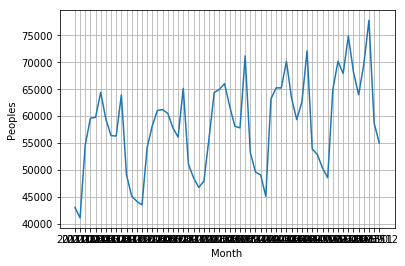

In [42]:
plt.xticks(index, VisitYM)
plt.plot(index,cnVisit)
plt.xlabel('Month')
plt.ylabel('Peoples')
plt.grid(True)
plt.show()